<a href="https://colab.research.google.com/github/speccy-benji/speedtest/blob/master/speedtest_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

# Set up base dataframe
First load all the rows into a json object
<br>Then create dataframe, convert timestamp colum to a datetime type
<br>Finally index on timestamp

In [0]:
with open('/gdrive/My Drive/data/speedtest/speedtest.json', 'r') as infile:
  data = [pd.io.json.loads(line) for line in infile]
df = pd.io.json.json_normalize(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
#convert from bits to Mbs
data_cols = ['upload', 'download']
df[data_cols]=df[data_cols]/1000000

In [3]:
print(df.head())
print(df.describe())
print(df.dtypes)

                                    upload  download    ping
timestamp                                                   
2019-11-01 18:15:04.044322+00:00  1.051673  1.597251  36.113
2019-11-01 21:15:03.071525+00:00  1.010771  1.403172  72.959
2019-11-02 00:15:03.069813+00:00  1.174640  3.743686  31.078
2019-11-02 03:15:03.084344+00:00  1.177159  3.744858  33.369
2019-11-02 06:15:02.730412+00:00  1.233261  3.715765  29.641
           upload    download        ping
count  168.000000  168.000000  168.000000
mean     1.129809    6.153407   54.876494
std      0.114735    3.580896   88.937503
min      0.505031    0.330980   28.816000
25%      1.112698    3.455929   30.809000
50%      1.153552    3.606352   32.448500
75%      1.196275   10.440405   34.493000
max      1.246831   11.615582  527.796000
upload      float64
download    float64
ping        float64
dtype: object


Do some visualisation

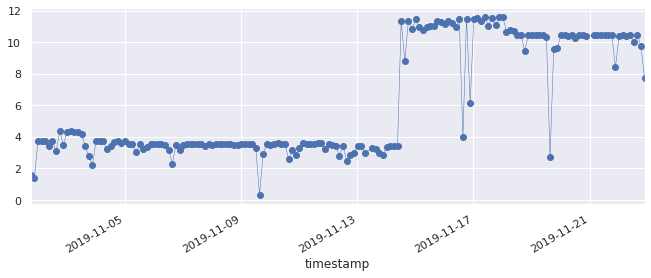

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
df['download'].plot(marker='o', linewidth=0.5)

Resample a daily average speed and plot that along with the 3 hourly measurememts
<br> also add in guaranteed min speed

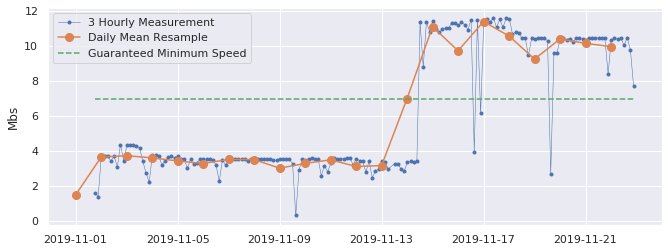

In [5]:
data_cols = ['download', 'upload']
df_daily_mean = df[data_cols].resample("D").mean()
df['minimum'] = 7.0
# Plot
fig, ax = plt.subplots()
ax.plot(df['download'],
marker='.', linestyle='-', linewidth=0.5, label='3 Hourly Measurement')
ax.plot(df_daily_mean['download'],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.plot(df['minimum'],
linestyle='dashed', label='Guaranteed Minimum Speed')
ax.set_ylabel('Mbs')
ax.legend();

Look at values by hour

In [6]:
df['hour']=df.index.hour
df_hourly = df.pivot_table(values='download', index='hour',aggfunc=('mean', 'max', 'min', 'std'))
print(df_hourly)

            max      mean       min       std
hour                                         
0     11.570004  6.190215  3.318731  3.631963
3     11.516848  6.351408  3.405699  3.580248
6     11.370577  6.300655  2.984813  3.577664
9     11.615582  6.374764  2.808060  3.684115
12    11.493426  6.606727  3.189471  3.665566
15    11.529146  5.475984  0.330980  3.714625
18    11.495240  6.214250  1.597251  3.760795
21    11.574959  5.742230  1.403172  3.510453


Better still, let's do a boxplot - can do this from the orig dataframe


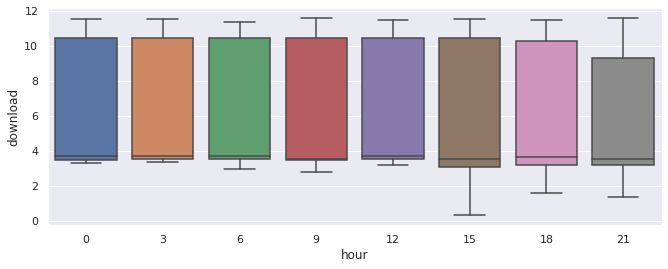

In [7]:
ax = sns.boxplot(x="hour", y="download", data=df)

What about by day?

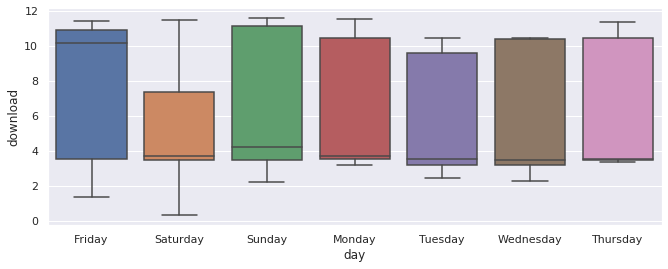

In [8]:
df['day'] = df.index.day_name()
ax = sns.boxplot(x='day', y='download', data=df)

try a scatterplot

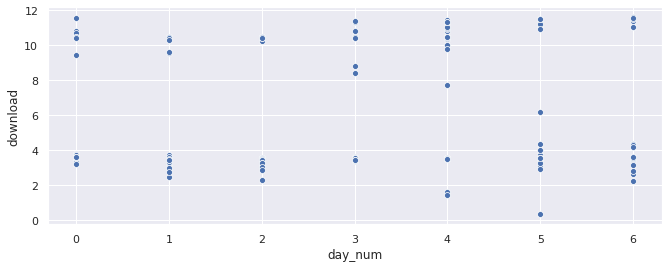

In [9]:
df['day_num']=df.index.dayofweek
ax = sns.scatterplot(x='day_num',y='download', data=df)

Differentiate by weekend/weekday


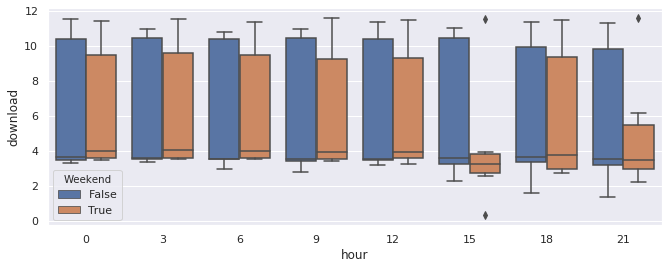

In [10]:
df["Weekend"] = df['day_num']>4
ax = sns.boxplot(x='hour', y='download', hue='Weekend', data=df)
